In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import pickle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

with open('/content/drive/My Drive/ai_project/data/f10-7.pkl', 'rb') as f:
    df = pickle.load(f)

Mounted at /content/drive


In [3]:
df = df[:-50]  # 뒤에 대충 그려서 보고 싶은데 너무 vary가 큼 예측하기 어렵고

In [4]:
n = 30
test_num = 10

In [5]:
# 5일 후 데이터 예측
X = np.array([df['value'].values[i:i+n] for i in range(len(df)-n-test_num+1)])
y = np.array([df['value'].values[i+n+test_num-1] for i in range(len(df)-n-test_num+1)])

In [6]:
X[test_num:4+test_num]

array([[223.        , 201.3       , 179.6       , 157.1       ,
        141.1       , 141.1       , 149.7       , 159.1       ,
        161.7       , 164.3       , 160.7       , 181.8       ,
        194.3       , 199.2       , 226.7       , 226.9       ,
        258.        , 252.3       , 260.9       , 302.        ,
        296.7       , 347.5       , 402.7       , 457.9       ,
        425.1       , 357.6       , 336.1       , 300.1       ,
        235.5       , 202.25      ],
       [201.3       , 179.6       , 157.1       , 141.1       ,
        141.1       , 149.7       , 159.1       , 161.7       ,
        164.3       , 160.7       , 181.8       , 194.3       ,
        199.2       , 226.7       , 226.9       , 258.        ,
        252.3       , 260.9       , 302.        , 296.7       ,
        347.5       , 402.7       , 457.9       , 425.1       ,
        357.6       , 336.1       , 300.1       , 235.5       ,
        202.25      , 169.        ],
       [179.6       , 157.1   

In [7]:
y[:4]

array([202.25      , 169.        , 165.33333333, 161.66666667])

In [8]:
X[test_num+10], y[10]

(array([160.7       , 181.8       , 194.3       , 199.2       ,
        226.7       , 226.9       , 258.        , 252.3       ,
        260.9       , 302.        , 296.7       , 347.5       ,
        402.7       , 457.9       , 425.1       , 357.6       ,
        336.1       , 300.1       , 235.5       , 202.25      ,
        169.        , 165.33333333, 161.66666667, 158.        ,
        159.9       , 155.1       , 157.1       , 159.1       ,
        167.2       , 188.9       ]),
 188.9)

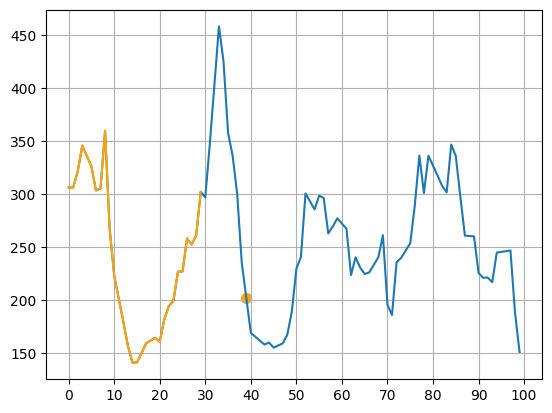

In [9]:
plt.plot(df['value'].values[:100])
plt.plot(X[0], color='orange')
plt.scatter(29+test_num, y[0], color='orange', s=50)
plt.xticks([10*i for i in range(11)])
plt.grid(True)

In [10]:
len(X), len(y)

(25900, 25900)

In [11]:
X.shape, y.shape

((25900, 30), (25900,))

In [12]:
X[0]

array([306.1 , 306.  , 321.4 , 345.6 , 335.75, 325.9 , 303.3 , 305.3 ,
       359.5 , 267.2 , 223.  , 201.3 , 179.6 , 157.1 , 141.1 , 141.1 ,
       149.7 , 159.1 , 161.7 , 164.3 , 160.7 , 181.8 , 194.3 , 199.2 ,
       226.7 , 226.9 , 258.  , 252.3 , 260.9 , 302.  ])

In [13]:
y[0]

202.25

In [ ]:

X = X.reshape((X.shape[0], X.shape[1], 1))

In [ ]:

# X_test, y_test = X[-test_num:], y[-test_num:]

In [14]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN, LSTM, GRU

In [15]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X[:-test_num]), np.array(y[:-test_num]), test_size=0.2, random_state=42)

In [ ]:
# X_train.shape, X_val.shape, y_train.shape, y_val.shape

((20728, 10, 1), (5182, 10, 1), (20728,), (5182,))

In [16]:
def plot_result(his):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.plot(his.history['loss'])
    ax1.plot(his.history['val_loss'])
    ax1.set_title('Model Loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Validation'], loc='upper right')

    ax2.plot(his.history['mae'])
    ax2.plot(his.history['val_mae'])
    ax2.set_title('Model MAE')
    ax2.set_ylabel('MAE')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Validation'], loc='upper right')

    plt.show()

In [ ]:
# def make_pred(num, model):
#     data_pred = np.array(df['value'].values[:-test_num])
#     for i in range(num):
#         temp = data_pred[-n:]
#         pred = model.predict(temp.reshape(1, -1))
#         data_pred = np.append(data_pred, pred)
#     return data_pred[-num:]

In [17]:
from keras.callbacks import EarlyStopping

custom_early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [18]:
model1 = Sequential()
model1.add(LSTM(200, input_shape=[None, 1])) # (None, 10, 1)
model1.add(Dense(1))
model1.compile(loss='mse', optimizer='adam', metrics=['mae'])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200)               161600    
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 161801 (632.04 KB)
Trainable params: 161801 (632.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
history1 = model1.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1,
                    callbacks=[custom_early_stopping])

Epoch 1/100
518/518 [==============================] - 10s 6ms/step - loss: 8355.3604 - mae: 71.6103 - val_loss: 3935.3059 - val_mae: 44.6608
Epoch 2/100
518/518 [==============================] - 3s 5ms/step - loss: 2576.5686 - mae: 33.6280 - val_loss: 1630.3544 - val_mae: 25.4567
Epoch 3/100
518/518 [==============================] - 3s 6ms/step - loss: 1287.8145 - mae: 22.8681 - val_loss: 1048.4857 - val_mae: 20.7882
Epoch 4/100
518/518 [==============================] - 3s 6ms/step - loss: 933.9904 - mae: 19.7572 - val_loss: 844.6618 - val_mae: 19.2184
Epoch 5/100
518/518 [==============================] - 3s 5ms/step - loss: 738.1704 - mae: 18.0546 - val_loss: 678.1478 - val_mae: 16.7371
Epoch 6/100
518/518 [==============================] - 2s 5ms/step - loss: 643.3889 - mae: 16.8038 - val_loss: 601.5161 - val_mae: 16.1513
Epoch 7/100
518/518 [==============================] - 2s 5ms/step - loss: 601.8718 - mae: 16.3553 - val_loss: 596.7902 - val_mae: 16.0677
Epoch 8/100
518/518 

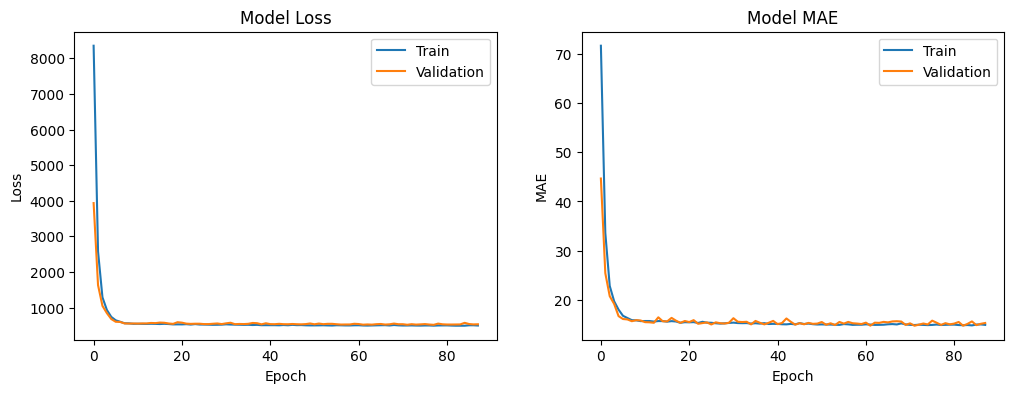

In [20]:
plot_result(history1)

In [21]:
mse = tf.keras.losses.MeanSquaredError()
mae = tf.keras.losses.MeanAbsoluteError()

In [22]:
pred1 = model1.predict(X_test)
print(mse(pred1.flatten(), y_test.flatten()), mae(pred1.flatten(), y_test.flatten()))

162/162 [==============================] - 1s 2ms/step
tf.Tensor(492.3083160237646, shape=(), dtype=float64) tf.Tensor(14.989916698423045, shape=(), dtype=float64)


In [23]:
model1.save('/content/drive/My Drive/ai_project/model/LSTM7.keras')

1/1 [==============================] - 0s 283ms/step


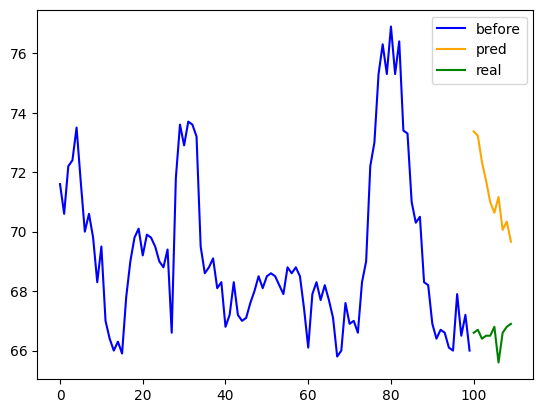

In [ ]:
pred_real = model1.predict(X_test)

left_num = 100
plt.plot(df['value'].values[-left_num-test_num:-test_num], label='before', color='blue')
plt.plot(range(left_num, left_num+test_num), pred_real, label='pred', color='orange')
plt.plot(range(left_num, left_num+test_num), y_test, label='real', color='green')
plt.legend()

In [ ]:
eval = model1.evaluate(X_test, y_test)

1/1 [==============================] - 0s 24ms/step - loss: 24.8787 - mae: 4.8096


In [ ]:
data_pred = np.array(df['value'].values[:-test_num*2-n+1]) # n=30, tset_num=10일 때 69
pred1 = []
pred_check = [0 for _ in range(test_num)]
for i in range(test_num):
    temp = data_pred[-n-test_num+i:-test_num+i]
    pred = model1.predict(temp.reshape(1, -1))
    print(temp)
    break
    pred1.append(pred[0][0])
    pred_check[i] = [temp, pred[0]]
pred_check

TypeError: ignored

array([[70.3],
       [69.6],
       [71.1],
       [72.2],
       [71.3]])

In [ ]:
accuracy = model1.evaluate(X_test, y_test)

1/1 [==============================] - 0s 26ms/step - loss: 12.3607 - mae: 3.1285


In [ ]:
pred2 = model1.predict(X_test[0].reshape(1, n, 1))
pred2
# ?

1/1 [==============================] - 0s 17ms/step


array([[79.885544]], dtype=float32)

In [ ]:
X_test[0]

array([[68.4],
       [67.8],
       [68.6],
       [66.4],
       [67.4],
       [67. ],
       [68.1],
       [68.9],
       [68.8],
       [68.6]])

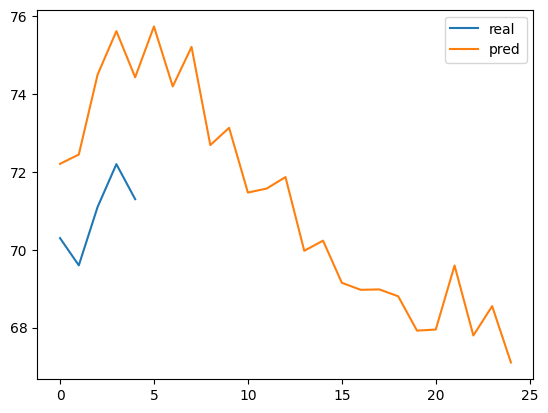

In [ ]:
plt.plot(y_test[:test_num], label='real')
plt.plot(pred1, label='pred')
plt.legend()

ValueError: ignored

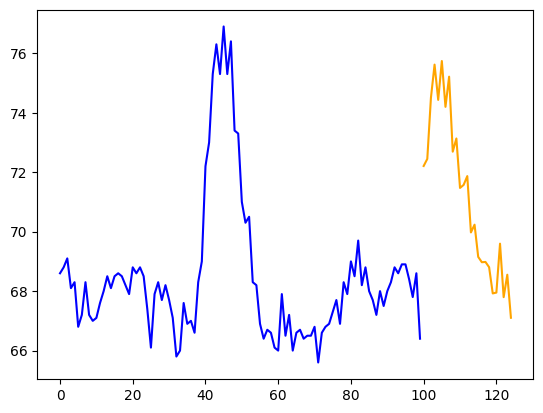

In [ ]:
left_num = 100
plt.plot(df['value'].values[-left_num-test_num:-test_num], label='before', color='blue')
plt.plot(range(left_num, left_num+test_num), pred1, label='pred', color='orange')
plt.plot(range(left_num, left_num+test_num), y_test, label='real', color='green')
plt.legend()

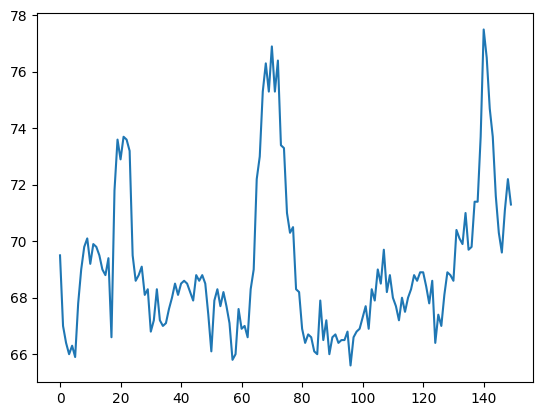

In [ ]:
plt.plot(df['value'].values[-150:])

In [ ]:
X_test[-1]

array([[69.7],
       [69.8],
       [71.4],
       [71.4],
       [73.7],
       [77.5],
       [76.5],
       [74.7],
       [73.7],
       [71.6]])

In [ ]:
X_test[-1].reshape(1, 10, 1)

array([[[69.7],
        [69.8],
        [71.4],
        [71.4],
        [73.7],
        [77.5],
        [76.5],
        [74.7],
        [73.7],
        [71.6]]])

In [ ]:
pred_x = model1.predict(X_test[-1].reshape(1, 10, 1))
pred_x

1/1 [==============================] - 4s 4s/step


array([[75.17824]], dtype=float32)

In [ ]:
y_test[-1]

71.3

In [ ]:
X_test[-1][:, 0]

array([69.7, 69.8, 71.4, 71.4, 73.7, 77.5, 76.5, 74.7, 73.7, 71.6])

In [ ]:
X_test

array([[[70.4],
        [70.1],
        [69.9],
        [71. ],
        [69.7],
        [69.8],
        [71.4],
        [71.4],
        [73.7],
        [77.5]],

       [[70.1],
        [69.9],
        [71. ],
        [69.7],
        [69.8],
        [71.4],
        [71.4],
        [73.7],
        [77.5],
        [76.5]],

       [[69.9],
        [71. ],
        [69.7],
        [69.8],
        [71.4],
        [71.4],
        [73.7],
        [77.5],
        [76.5],
        [74.7]],

       [[71. ],
        [69.7],
        [69.8],
        [71.4],
        [71.4],
        [73.7],
        [77.5],
        [76.5],
        [74.7],
        [73.7]],

       [[69.7],
        [69.8],
        [71.4],
        [71.4],
        [73.7],
        [77.5],
        [76.5],
        [74.7],
        [73.7],
        [71.6]]])

In [ ]:
y_test

array([70.3, 69.6, 71.1, 72.2, 71.3])

In [ ]:
X_test.shape

(5, 10, 1)

In [ ]:
pred3 = model1.predict(X_test)

1/1 [==============================] - 0s 19ms/step


In [ ]:
pred3

array([[79.88553 ],
       [78.71652 ],
       [77.362526],
       [76.98361 ],
       [75.17824 ]], dtype=float32)

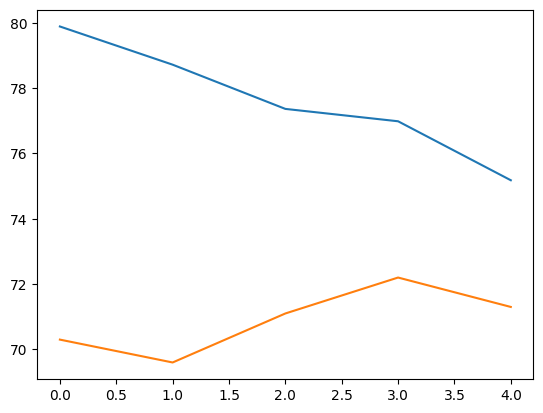

In [ ]:
plt.plot(pred3)
plt.plot(y_test)

In [ ]:
# data_pred = np.array(df['value'].values[:-t_num])
pred_weird = []
for i in range(pred_num):
    temp = df['value'].values[-n-t_num+i:-t_num+i]
    pred = model1.predict(temp.reshape(1, -1), verbose=0)
    pred_weird.append(pred[0])
pred_weird

In [ ]:
left_num = 100
plt.plot(df['value'].values[-left_num-t_num:-t_num], label='before', color='blue')
plt.plot(range(left_num, left_num+pred_num), pred_weird, label='pred', color='orange')
plt.plot(range(left_num, left_num+pred_num), y_test, label='real', color='green')
plt.legend()

In [ ]:
data_pred_2 = np.array(df['value'].values[:-t_num-100])
for i in range(pred_num+100):
    temp = data_pred_2[-n:]
    pred = model1.predict(temp.reshape(1, -1), verbose=0)
    data_pred_2 = np.append(data_pred_2, pred[0])
pred2 = data_pred_2[-pred_num-100:]

In [ ]:
pred2

In [ ]:
y_test[-t_num-100:]

In [ ]:
t_num2 = t_num + 100
left_num = 70
plt.plot(df['value'].values[-left_num-t_num2:-t_num2], label='before', color='blue')
plt.plot(range(left_num-1, left_num+pred_num+100-1), pred2, label='pred', color='orange')
plt.plot(range(left_num-1, left_num+pred_num+100-1), y[-t_num2:], label='real', color='green')
plt.legend()

In [ ]:
pred_weird2 = []
for i in range(pred_num+100):
    temp = df['value'].values[-n-t_num2+i:-t_num2+i]
    pred = model1.predict(temp.reshape(1, -1), verbose=0)
    pred_weird2.append(pred[0])
pred_weird2

In [ ]:
left_num = 70
plt.plot(df['value'].values[-left_num-t_num2:-t_num2], label='before', color='blue')
plt.plot(range(left_num-1, left_num+pred_num+100-1), pred_weird2, label='pred', color='orange')
plt.plot(range(left_num-1, left_num+pred_num+100-1), y[-t_num2:], label='real', color='green')
plt.legend()

In [ ]:
# model1.save('/content/drive/My Drive/ai_project/model/LSTM5.keras')

In [ ]:
model1 = keras.models.load_model('/content/drive/My Drive/ai_project/model/LSTM5.keras')